## Extract lathe_laur data as csv files (one per sample)

In [4]:
import json
import pandas as pd
import re
import os
import codecs
import csv

In [2]:
# Get a list of all files
path = 'datasets/lathe_laur/'
list_files = [path+i for i in os.listdir(path)]
list_files.sort()
list_files


['datasets/lathe_laurtype_a.json',
 'datasets/lathe_laurtype_b.json',
 'datasets/lathe_laurtype_c.json',
 'datasets/lathe_laurtype_d.json',
 'datasets/lathe_laurtype_e.json',
 'datasets/lathe_laurtype_f.json',
 'datasets/lathe_laurtype_g.json',
 'datasets/lathe_laurtype_h.json',
 'datasets/lathe_laurtype_i.json',
 'datasets/lathe_laurtype_j.json']

In [7]:
data_list = []

for file_name in list_files:
    # Extract them in a list
    type_n_data = []

    with open(file_name) as file:
        for line in file:
            json_obj = json.loads(line)
            type_n_data.append(json_obj)
    

    # Make a df of each sample
    type_df_list = []
    for i, item in enumerate(type_n_data):
        values = item['payload']['values']
        df = pd.DataFrame(values)
        type_df_list.append(df)
    
    data_list.append(type_df_list)

#type1_df_list[0].mean()
#df = pd.read_json("json_data_centralized/test.json")
#df["payload"]['values']

#### df architecture

 0 - xAxis;
 1 - yAxis;
 2 - zAzis;

In [37]:
# Type 1 - Analysis
type_1 = data_list[0]

# List of means
type_1_means = []
for i in range(10):
    type_1_means.append(type_1[i].mean())
pd.DataFrame(type_1_means).var()

0    0.000084
1    0.000044
2    0.000021
dtype: float64

In [44]:
var_list = []
for i in data_list:
    list_means = []
    for j in range(5):
        list_means.append(i[j].mean())
    var_list.append(pd.DataFrame(list_means).var())

<AxesSubplot:>

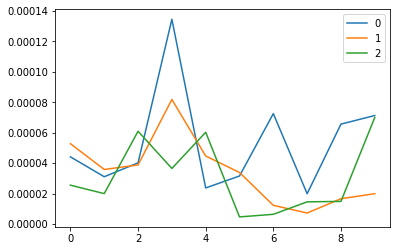

In [47]:
pd.DataFrame(var_list).plot()